In [1]:
!unzip /content/Conjunctiva-Segmentation-2.v2-segmentation_2.yolov8.zip

Archive:  /content/Conjunctiva-Segmentation-2.v2-segmentation_2.yolov8.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/30_jpg.rf.e85905338434db3b4976fd0ebc686973.jpg  
 extracting: test/images/32_jpg.rf.942e42a1c5417052634b8736629ad11e.jpg  
 extracting: test/images/38_jpg.rf.43afee1f14ec657fc74f55284c547f23.jpg  
 extracting: test/images/38_jpg.rf.ffd57a9865f4478ae92cd646058173d0.jpg  
 extracting: test/images/39_jpg.rf.b97760d871a248a59e4589b0345a53fc.jpg  
 extracting: test/images/40_jpg.rf.4eda82c6e5f714159f60881265012190.jpg  
 extracting: test/images/42_jpg.rf.d7ede427b6a8889641b11bc90c197632.jpg  
 extracting: test/images/45_jpg.rf.3e6fddca886ccccbeeedef3933f53719.jpg  
 extracting: test/images/45_jpg.rf.8b82a3fe3380226c774bd15dab58baf2.jpg  
 extracting: test/images/46_jpg.rf.2558ab8db0c37ab72a900a1d2f9d3f36.jpg  
 extracting: test/images/4

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 16.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from ultralytics import YOLO
import cv2
from PIL import Image
import yaml
import random

In [4]:
sns.set(rc={'axes.facecolor': '#ffe4de'}, style='darkgrid')

In [5]:
dataDir = '/content/Conjunctiva-Segmentation'

<function matplotlib.pyplot.show(close=None, block=None)>

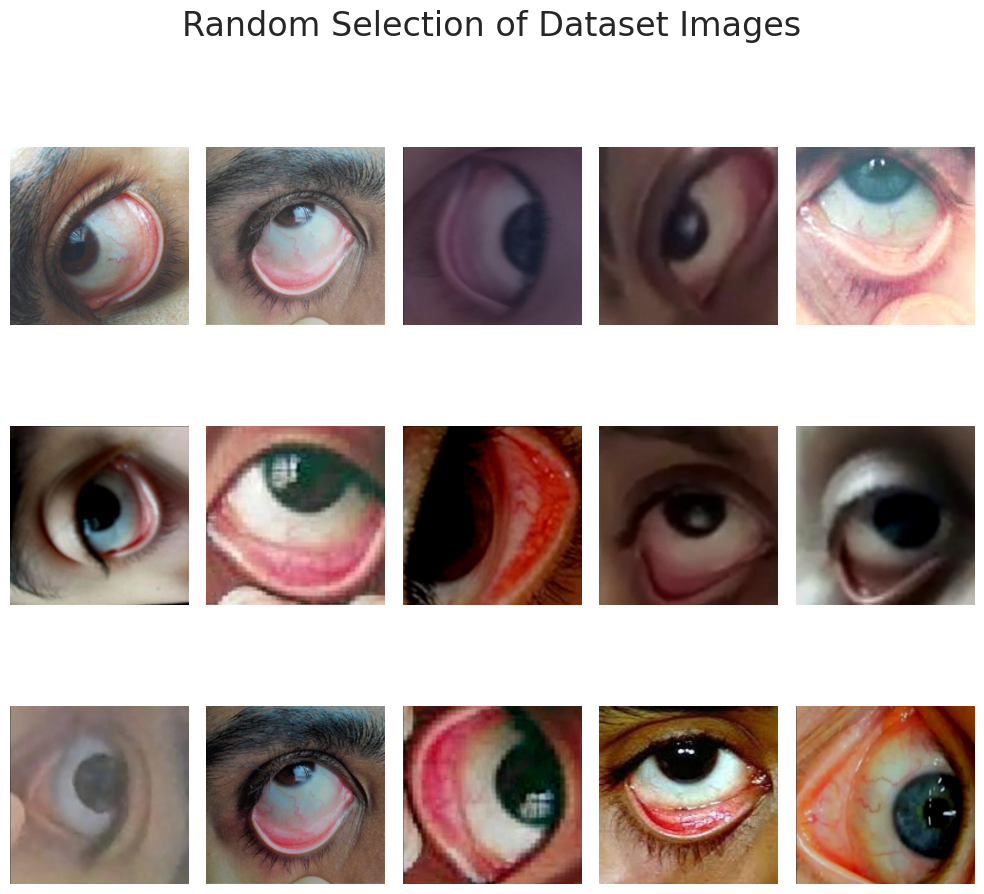

In [6]:
trainImagePath = os.path.join(dataDir, 'train', 'images')

imagesFiles = [f for f in os.listdir(trainImagePath) if f.endswith('.jpg')]

randomImages = random.sample(imagesFiles, 15)

plt.figure(figsize=(10, 10))

for i, image_file in enumerate(randomImages):
  image_path = os.path.join(trainImagePath, image_file)
  image = Image.open(image_path)
  plt.subplot(3, 5, i + 1)
  plt.imshow(image)
  plt.axis('off')

plt.suptitle('Random Selection of Dataset Images', fontsize = 24)

plt.tight_layout()
plt.show

In [7]:
model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.73M/6.73M [00:00<00:00, 371MB/s]


In [8]:
yamlFilePath = os.path.join(dataDir, 'data.yaml')

In [9]:
results = model.train(
    data = yamlFilePath,
    epochs = 30,
    imgsz = 640,
    batch = 32,
    optimizer = 'auto',
    lr0 = 0.0001,
    lrf = 0.01,
    dropout = 0.25,
    device = 0,
    seed = 42
)

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/Conjunctiva-Segmentation/data.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.25, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 755k/755k [00:00<00:00, 103MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 286MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/Conjunctiva-Segmentation/train/labels... 303 images, 0 backgrounds, 0 corrupt: 100%|██████████| 303/303 [00:00<00:00, 974.73it/s] 

train: New cache created: /content/Conjunctiva-Segmentation/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/Conjunctiva-Segmentation/valid/labels... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<00:00, 260.95it/s]

val: New cache created: /content/Conjunctiva-Segmentation/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/30      5.84G      1.976      5.208      3.544      2.201         25        640: 100%|██████████| 10/10 [00:14<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         15         15    0.00311      0.933     0.0786     0.0231   0.000889      0.267    0.00908   0.000983



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/30       5.4G      1.601      3.707      2.777      1.729         34        640: 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         15         15    0.00792      0.933      0.564      0.235    0.00566      0.667      0.256     0.0509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/30      5.38G      1.395      2.821      2.124      1.497         32        640: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         15         15      0.871      0.451      0.583      0.236    0.00133        0.4      0.124     0.0548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/30      5.34G      1.456      2.584      1.969      1.504         30        640: 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         15         15    0.00986          1     0.0571      0.015   0.000889      0.267    0.00215   0.000526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/30      5.31G      1.401       2.53      1.855      1.488         35        640: 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         15         15      0.361      0.467      0.325       0.14      0.306      0.267      0.184     0.0658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/30      5.38G      1.393      2.317      1.686      1.435         38        640: 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         15         15      0.852      0.533      0.701      0.282      0.649        0.4      0.411      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/30      5.31G       1.36      2.146      1.587      1.409         37        640: 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         15         15      0.306      0.207      0.262      0.099      0.862     0.0667     0.0763     0.0293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/30      5.38G      1.334      2.224      1.597      1.416         31        640: 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         15         15      0.558      0.673      0.656      0.287      0.805        0.4      0.419      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/30      5.28G      1.326      2.205      1.442      1.378         42        640: 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         15         15      0.434      0.512      0.352      0.136      0.201      0.333      0.233     0.0552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.34G      1.247      2.055      1.337      1.334         34        640: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         15         15      0.922        0.6      0.709      0.276       0.81      0.569      0.645      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/30      5.39G      1.316      2.092      1.359      1.372         35        640: 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         15         15      0.695      0.667      0.749      0.453      0.882      0.667      0.765      0.207



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.42G      1.267      2.076       1.26      1.357         29        640: 100%|██████████| 10/10 [00:07<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         15         15      0.693        0.4      0.522      0.217      0.553        0.4      0.461      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.37G      1.239      1.911      1.169      1.305         38        640: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         15         15       0.57        0.6      0.465      0.218       0.57        0.6      0.446      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.28G      1.242       1.94      1.137       1.32         31        640: 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         15         15      0.785      0.729      0.762       0.35      0.712      0.667       0.65      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/30       5.4G      1.155      1.936       1.06      1.287         30        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         15         15      0.723      0.733      0.788      0.388      0.668      0.537      0.622       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/30      5.43G      1.141      1.789      1.003      1.245         31        640: 100%|██████████| 10/10 [00:07<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all         15         15      0.878      0.733      0.851      0.433      0.714        0.6      0.721      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.26G      1.065      1.755     0.9756      1.217         36        640: 100%|██████████| 10/10 [00:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         15         15      0.628      0.733      0.717      0.417      0.573        0.6      0.564      0.266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/30      5.37G      1.068      1.789     0.9411      1.218         38        640: 100%|██████████| 10/10 [00:06<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         15         15      0.874      0.924      0.868      0.426      0.811      0.867      0.766      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/30      5.41G      1.049       1.83     0.9387        1.2         37        640: 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         15         15      0.933      0.922      0.957      0.443      0.933      0.922      0.957       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/30      5.34G       1.01       1.69     0.8696       1.19         36        640: 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         15         15      0.937      0.996      0.974      0.493      0.915      0.933      0.946        0.4


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.25G     0.9737      1.329      1.069      1.311         15        640: 100%|██████████| 10/10 [00:11<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         15         15      0.811      0.867      0.886      0.324      0.811      0.867      0.851      0.353



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.25G     0.9502      1.239     0.9327      1.287         15        640: 100%|██████████| 10/10 [00:06<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         15         15      0.839      0.933      0.976      0.496      0.821      0.917      0.877      0.419



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/30      5.25G     0.8322      1.143     0.8175      1.196         15        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         15         15      0.917      0.933      0.963      0.546      0.878      0.867      0.907      0.403



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.25G      0.829      1.067      0.785      1.202         15        640: 100%|██████████| 10/10 [00:04<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         15         15      0.771      0.867      0.918      0.442      0.771      0.867      0.876      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/30      5.25G     0.8736      1.088     0.7789      1.215         15        640: 100%|██████████| 10/10 [00:07<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         15         15      0.991      0.733      0.904      0.484      0.901      0.667      0.793      0.395



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.25G     0.7673       1.05     0.7264      1.126         15        640: 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         15         15      0.996      0.933      0.985      0.502      0.996      0.933      0.935      0.513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.25G     0.7074     0.9673     0.6965      1.112         15        640: 100%|██████████| 10/10 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         15         15          1      0.913      0.951      0.518          1      0.913      0.951      0.473



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.25G     0.6843     0.9652      0.669      1.089         15        640: 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         15         15      0.932          1      0.987      0.506      0.975          1      0.995      0.513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/30      5.25G     0.6395     0.9418     0.6476      1.066         15        640: 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         15         15       0.99      0.933      0.938      0.538      0.927          1      0.982      0.498



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/30      5.25G     0.6228     0.8994     0.6244      1.062         15        640: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         15         15          1      0.923      0.938      0.573          1      0.923      0.988      0.506



30 epochs completed in 0.076 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv_transpose2d(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


                   all         15         15          1      0.923      0.938       0.57          1      0.923      0.988      0.506
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/segment/train


In [10]:
bestModelpath = '/content/runs/segment/train/weights/best.pt'
bestModel = YOLO(bestModelpath)


image 1/1 /content/Conjunctiva-Segmentation/valid/images/41_jpg.rf.e2f7cec3fca37abf97c6ec4614dc4ac6.jpg: 640x640 1 conjunctiva_pallor, 18.8ms
Speed: 1.8ms preprocess, 18.8ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Conjunctiva-Segmentation/valid/images/10_jpg.rf.7b64edf6df7c20b65a5e0c339928582f.jpg: 640x640 1 conjunctiva_pallor, 19.6ms
Speed: 1.9ms preprocess, 19.6ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Conjunctiva-Segmentation/valid/images/37_jpg.rf.c477b424cc159c1d26845948c629ce55.jpg: 640x640 1 conjunctiva_pallor, 18.8ms
Speed: 1.8ms preprocess, 18.8ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Conjunctiva-Segmentation/valid/images/25_jpg.rf.e6ed4a77336b88b0ed2944846b328dc3.jpg: 640x640 1 conjunctiva_pallor, 16.3ms
Speed: 1.3ms preprocess, 16.3ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Conjunctiva-Segmenta

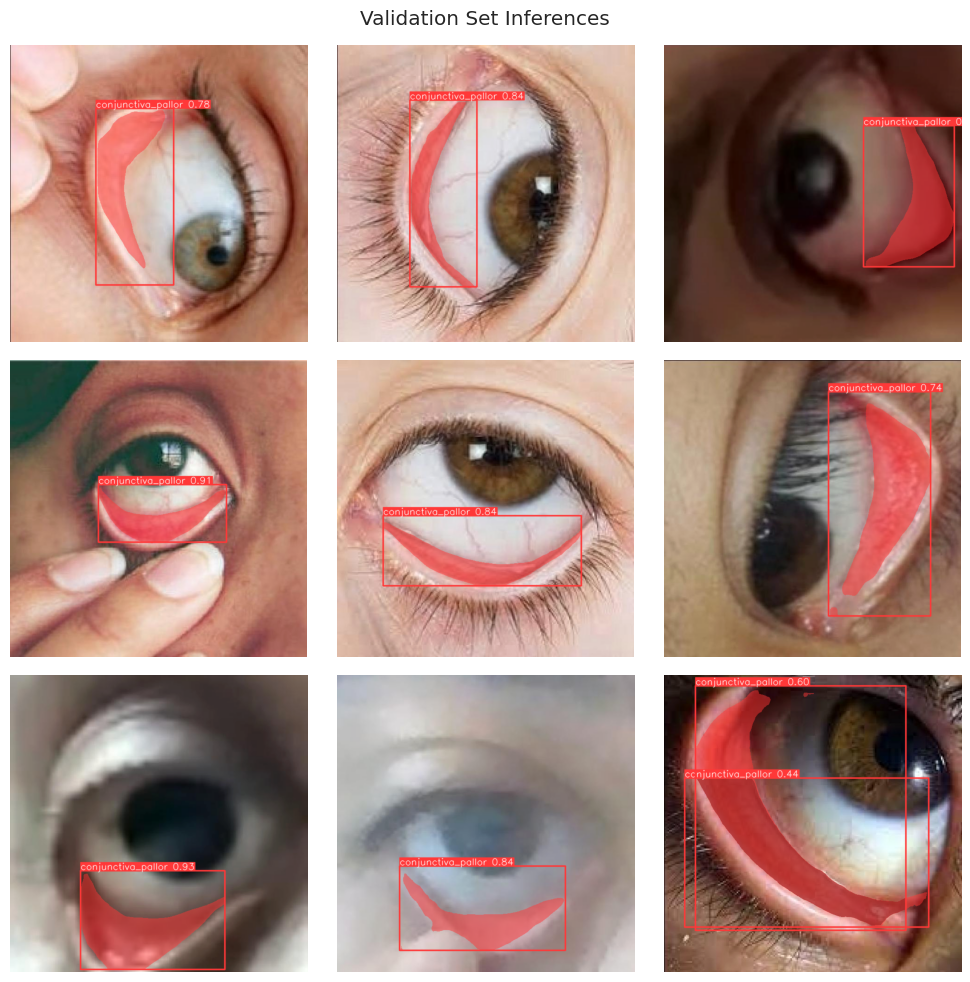

In [11]:
validImagePath = os.path.join(dataDir, 'valid', 'images')

imageFiles = [f for f in os.listdir(validImagePath) if f.endswith('.jpg')]

numImages = len(imageFiles)
selectedImage = [imageFiles[i] for i in range(0, numImages, numImages // 9)]

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Validation Set Inferences')

for i, ax in enumerate(axes.flatten()):
  imagePath = os.path.join(validImagePath, selectedImage[i])
  results = bestModel.predict(source = imagePath, imgsz=640)
  annotatedImage = results[0].plot()
  annotatedImageRGB = cv2.cvtColor(annotatedImage, cv2.COLOR_BGR2RGB)
  ax.imshow(annotatedImageRGB)
  ax.axis('off')

plt.tight_layout()
plt.show()


image 1/1 /content/example1.jpg: 448x640 1 conjunctiva_pallor, 13.2ms
Speed: 1.9ms preprocess, 13.2ms inference, 3.1ms postprocess per image at shape (1, 3, 448, 640)


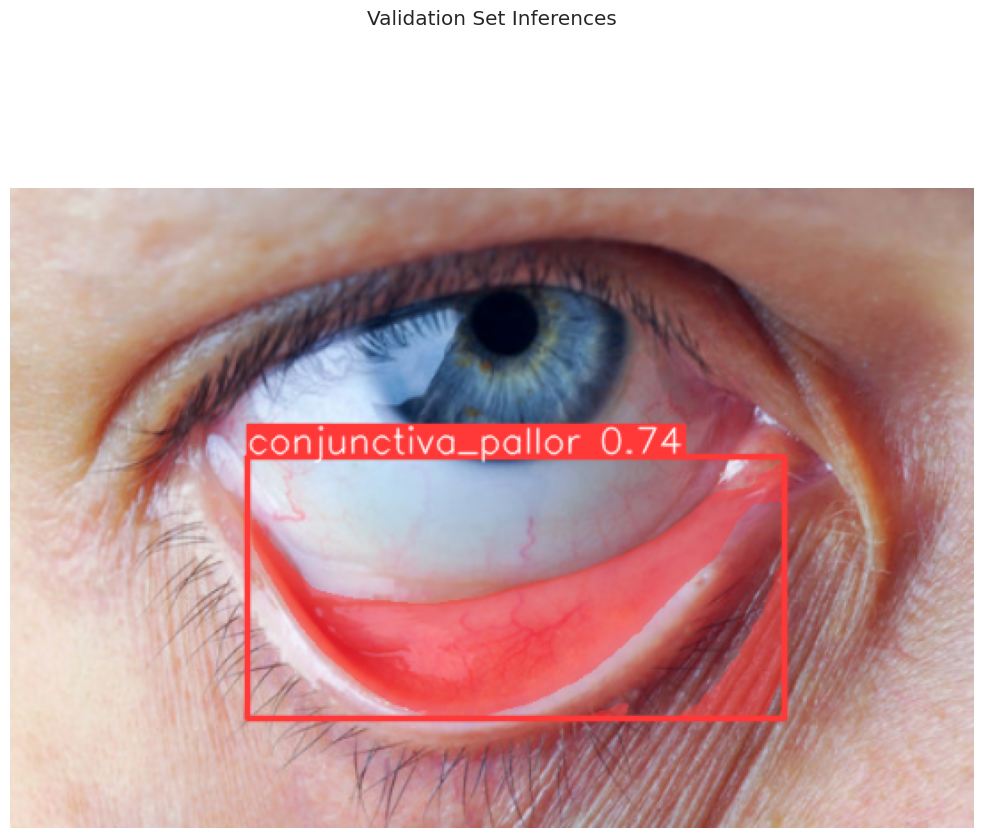

In [33]:
imagePath = '/content/example1.jpg'

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.suptitle('Validation Set Inferences')

# Ensure the image exists at the given path
assert os.path.exists(imagePath), f"Image not found at {imagePath}"

# Predict and plot
results = bestModel.predict(source=imagePath, imgsz=640)

# Debugging: Print the results to check what is returned
# print(results)

# Display the image
ax.imshow(annotatedImageRGB)
ax.axis('off')

plt.tight_layout()
plt.show()
